Data loading

In [29]:
from pandas import read_csv ,to_datetime,merge,DataFrame
url = r'C:\Users\ok\Desktop\pro\python\CSV dataset\Ben 10 Alien Universe — Realistic Battle Dataset\b'

aliens = read_csv(url + 'en10_aliens.csv', encoding='UTF-8-SIG')

battles = read_csv(url+'en10_battles.csv', encoding='ascii')

enemies =read_csv(url+'en10_enemies.csv', encoding='UTF-8-SIG')

Data display

In [30]:
print(aliens.describe(),'\n',aliens.info())
print(f'Data dimensions aliens :\n{aliens.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   alien_id        74 non-null     int64 
 1   alien_name      74 non-null     object
 2   species         74 non-null     object
 3   home_planet     74 non-null     object
 4   strength_level  74 non-null     int64 
 5   speed_level     74 non-null     int64 
 6   intelligence    74 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 4.2+ KB
        alien_id  strength_level  speed_level  intelligence
count  74.000000       74.000000    74.000000     74.000000
mean   37.500000        7.716216     6.783784      7.648649
std    21.505813        1.716322     2.134327      1.715621
min     1.000000        5.000000     4.000000      5.000000
25%    19.250000        6.250000     5.000000      6.000000
50%    37.500000        8.000000     7.000000      8.000000
75%    55.750000        9.000000

In [31]:
print(battles.describe(),'\n',battles.info())
print(f'Data dimensions battles :\n{battles.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   battle_id    300 non-null    int64 
 1   alien_name   300 non-null    object
 2   enemy_name   300 non-null    object
 3   battle_date  300 non-null    object
 4   winner       300 non-null    object
dtypes: int64(1), object(4)
memory usage: 11.8+ KB
        battle_id
count  300.000000
mean   150.500000
std     86.746758
min      1.000000
25%     75.750000
50%    150.500000
75%    225.250000
max    300.000000 
 None
Data dimensions battles :
(300, 5)


In [32]:
print(enemies.describe(),'\n',enemies.info())
print(f'Data dimensions enemies :\n{enemies.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   enemy_id    147 non-null    int64 
 1   alien_name  147 non-null    object
 2   enemy_name  147 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.6+ KB
         enemy_id
count  147.000000
mean    74.000000
std     42.579338
min      1.000000
25%     37.500000
50%     74.000000
75%    110.500000
max    147.000000 
 None
Data dimensions enemies :
(147, 3)


In [33]:
print(f'Aliens data columns :{aliens.columns.tolist()}\n')
print(f'Battles data columns :{battles.columns.tolist()}\n')
print(f'Enemies data columns :{enemies.columns.tolist()}\n')

Aliens data columns :['alien_id', 'alien_name', 'species', 'home_planet', 'strength_level', 'speed_level', 'intelligence']

Battles data columns :['battle_id', 'alien_name', 'enemy_name', 'battle_date', 'winner']

Enemies data columns :['enemy_id', 'alien_name', 'enemy_name']



In [34]:
print('Missing values in aliens_df:', aliens.isnull().sum().to_dict())
print('Missing values in battles_df:', battles.isnull().sum().to_dict())
print('Missing values in enemies_df:', enemies.isnull().sum().to_dict())

Missing values in aliens_df: {'alien_id': 0, 'alien_name': 0, 'species': 0, 'home_planet': 0, 'strength_level': 0, 'speed_level': 0, 'intelligence': 0}
Missing values in battles_df: {'battle_id': 0, 'alien_name': 0, 'enemy_name': 0, 'battle_date': 0, 'winner': 0}
Missing values in enemies_df: {'enemy_id': 0, 'alien_name': 0, 'enemy_name': 0}


Data cleaning and preprocessing :

Convert string date to number

In [35]:
if battles['battle_date'].dtype == 'object':
    try:
        battles['battle_date'] = to_datetime(battles['battle_date']) 
    except Exception as error:
        print('Error converting battle_date:', error)

Error converting battle_date: time data "31-10-2022" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


Data visualization

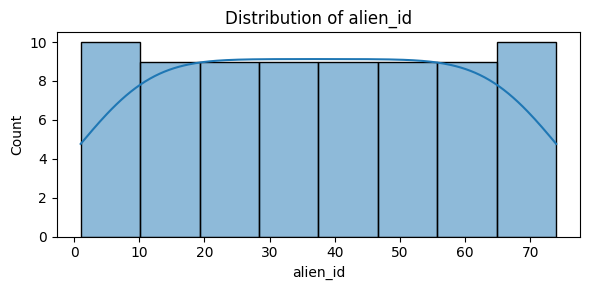

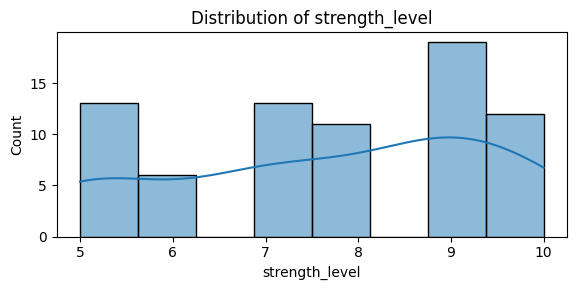

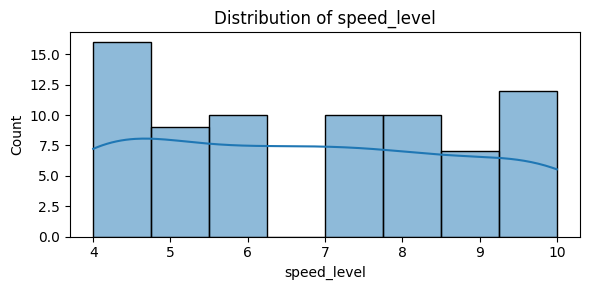

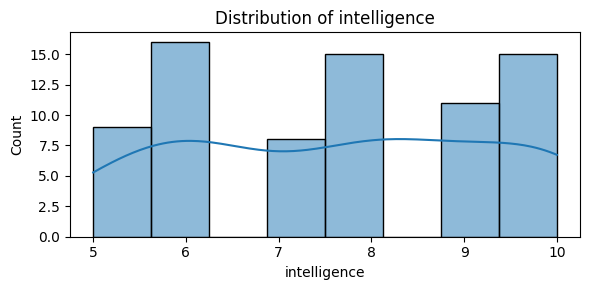

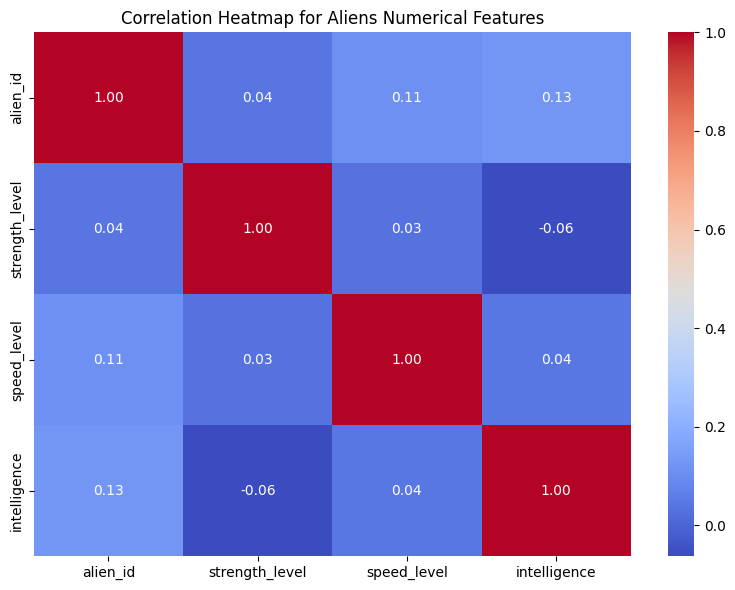

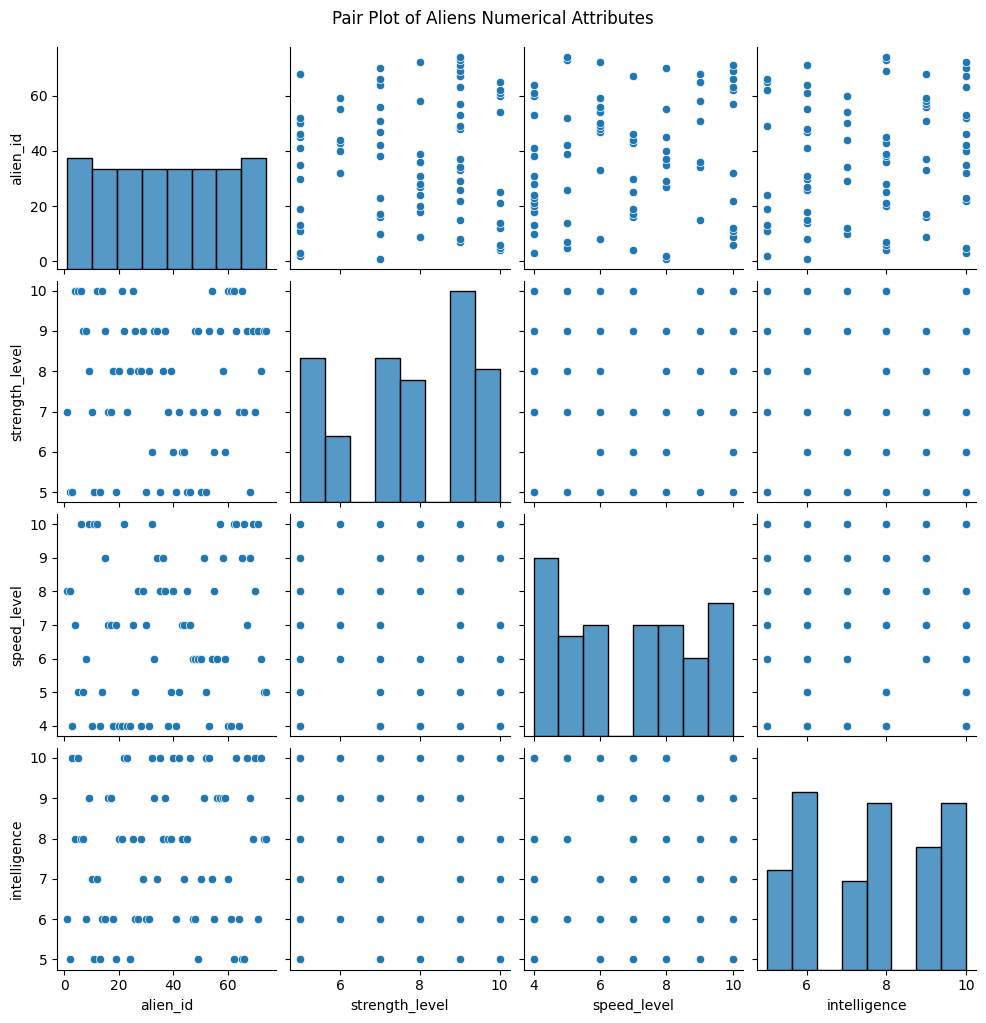

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_df = aliens.select_dtypes(include=[np.number])
numeric_columns = numeric_df.columns.tolist()
numeric_columns

for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(aliens[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

if len(numeric_columns) >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap for Aliens Numerical Features')
    plt.tight_layout()
    plt.show()

sns.pairplot(aliens[numeric_columns])
plt.suptitle('Pair Plot of Aliens Numerical Attributes', y=1.02)
plt.show()

C:\Users\ok\AppData\Local\Temp\ipykernel_5412\440160414.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


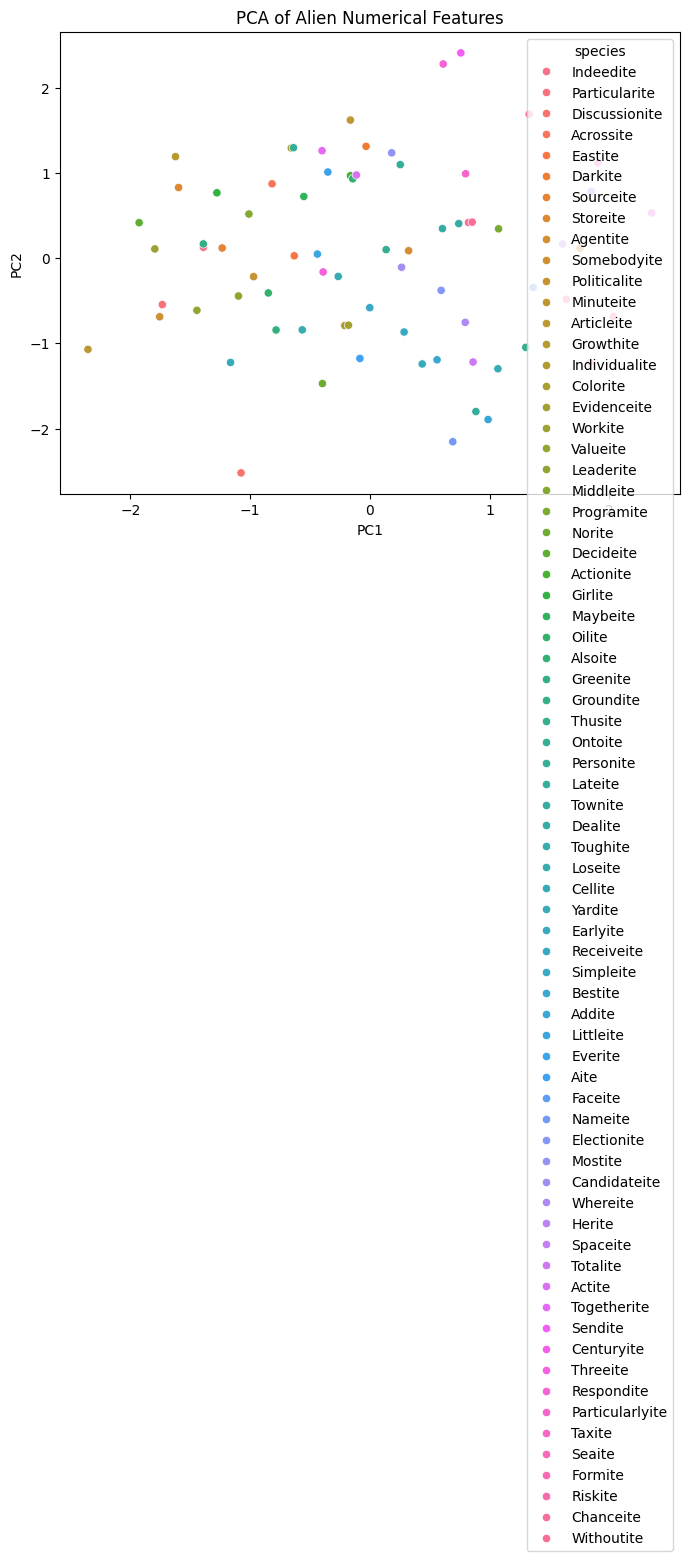

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# آماده‌سازی داده
scaled = StandardScaler().fit_transform(numeric_df)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

# رسم نمودار
pca_df = DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['species'] = aliens['species']  # فرض بر این که همچین ستونی وجود داره

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df)
plt.title('PCA of Alien Numerical Features')
plt.tight_layout()
plt.show()

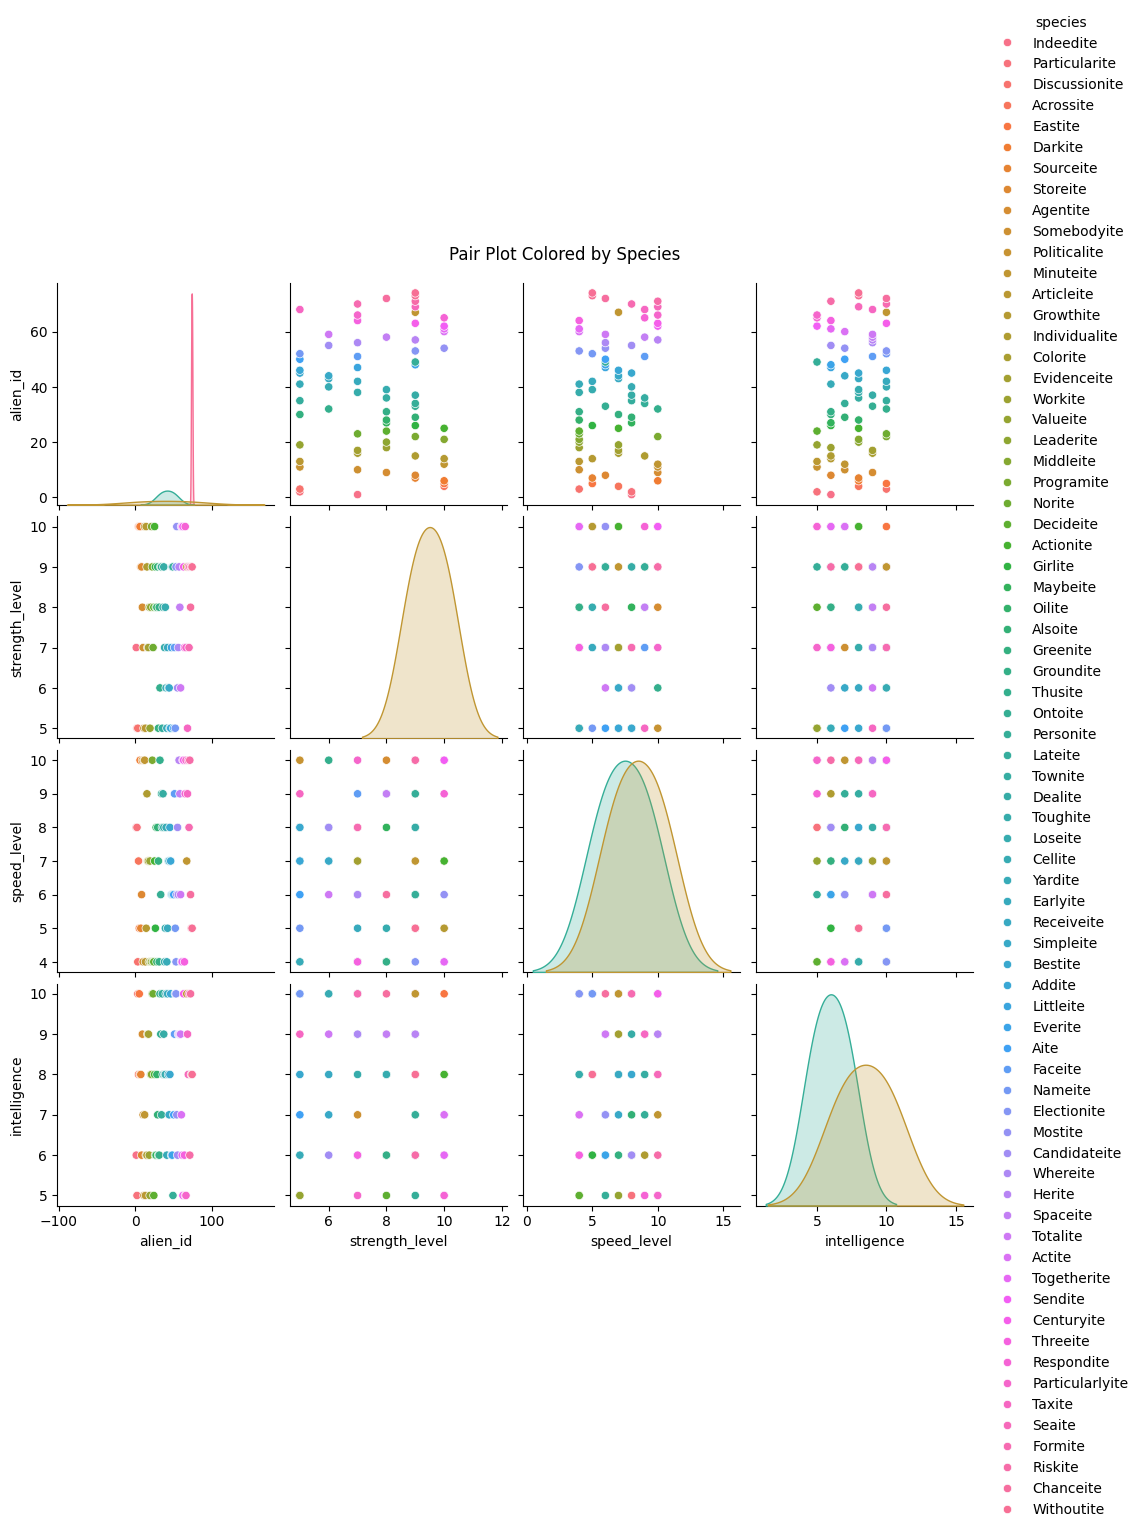

In [39]:
sns.pairplot(aliens, hue='species')
plt.suptitle('Pair Plot Colored by Species', y=1.02)
plt.show()

Model making

Logistic Regression Model Accuracy: 0.58


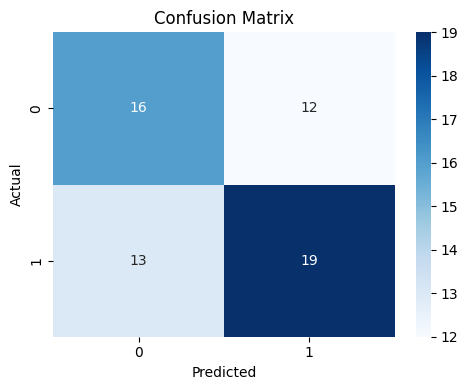

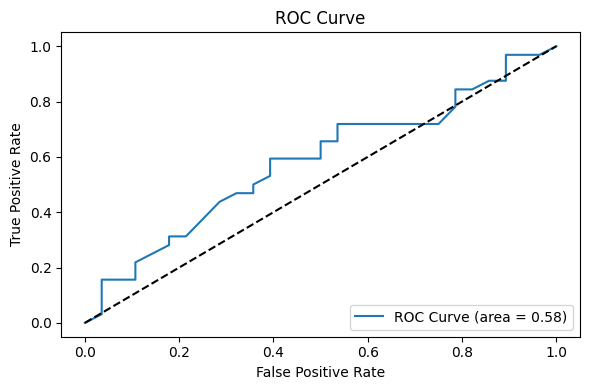

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

battles['alien_win'] = battles.apply(lambda row: 1 if row['winner'] == row['alien_name'] else 0, axis=1)

battle_aliens = merge(battles, aliens, how='left', on='alien_name')

missing_aliens = battle_aliens['alien_id'].isnull().sum()
if missing_aliens > 0:
    print(f'Warning: {missing_aliens} battles do not have matching alien attributes in aliens_df.')

features = ['strength_level', 'speed_level', 'intelligence']
X = battle_aliens[features]
y = battle_aliens['alien_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()